# Задание 3

В алгоритме Policy Iteration важным гиперпараметром является gamma. Требуется ответить на вопрос, какой gamma лучше выбирать. Качество обученной политики можно оценивать например запуская среду 1000 раз и взяв после этого средний total_reward. 

In [27]:
import pandas as pd
df1 = pd.read_csv("task1_1.csv")
df1.head()

,gamma,reward
0,0.01,0.755
1,0.02,0.747
2,0.03,0.744
3,0.04,0.723
4,0.05,0.724


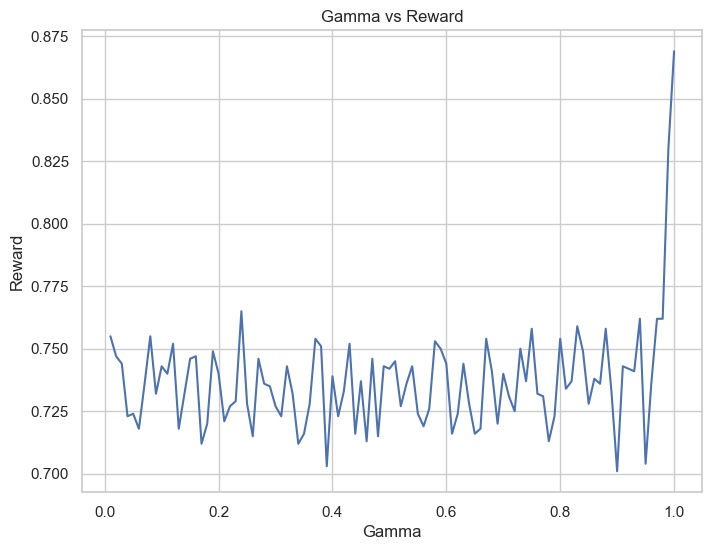

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Assuming 'df' is your DataFrame with "gamma" and "reward" columns
plt.figure(figsize=(8, 6))
sns.lineplot(data=df1, x='gamma', y='reward', markers=True)

plt.xlabel('Gamma')
plt.ylabel('Reward')
plt.title('Gamma vs Reward')

# Show the plot
plt.show()

Проанализируем все значения gamma от 0.01 до 1 с шагом 0.01, чтобы понять в каком диапазоне искать оптимальное значение gamma. График показывает что почти все значения выдают одинаковое (с точностью до шума) значение средней награды, в районе 0.75. Исключение составляют значение близкие к единице, включая саму единицу, которые дают среднюю награду около 0.85. Проанализируем большее точно интервал от 0.99 до 1.

In [29]:
df2 = pd.read_csv("task1_2.csv")
df2.head()

,gamma,reward
0,0.9900,0.862
1,0.9901,0.859
2,0.9902,0.865
3,0.9903,0.849
4,0.9904,0.849


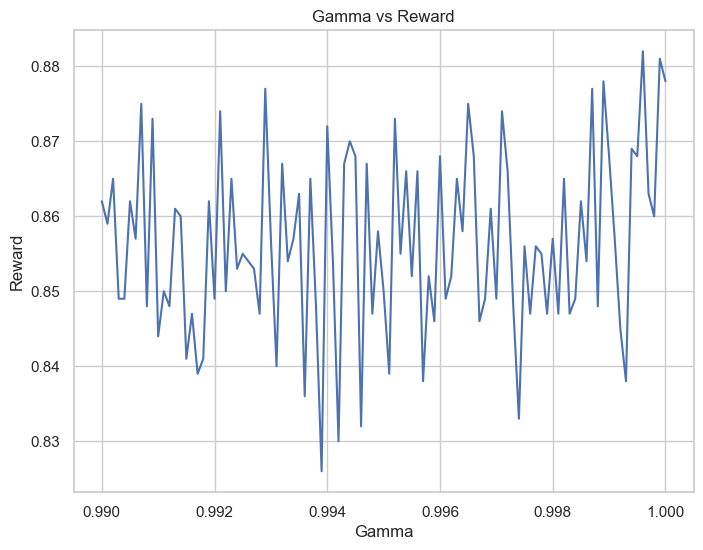

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Assuming 'df' is your DataFrame with "gamma" and "reward" columns
plt.figure(figsize=(8, 6))
sns.lineplot(data=df2, x='gamma', y='reward', markers=True)

plt.xlabel('Gamma')
plt.ylabel('Reward')
plt.title('Gamma vs Reward')

# Show the plot
plt.show()

На этом графике видно что почти все значения дают примерно один и тот же результат.

**Результат:**
* Оптимальное значение gamma = 1.
* Поскольку теоретические гарантии есть только для gamma меньше единицы, можно использовать значения очень близкие к 1, например, 0.9999, но данная среда достаточно простая и, кажется, 1 вполне остаточно.

На шаге Policy Evaluation мы каждый раз начинаем с нулевых values. А что будет если вместо этого начинать с values обученных на предыдущем шаге? Будет ли алгоритм работать? Если да, то будет ли он работать лучше?

In [31]:
df3 = pd.read_csv("task2.csv")
df3.head()

,gamma,reward
0,0.01,0.733
1,0.02,0.744
2,0.03,0.757
3,0.04,0.750
4,0.05,0.726


In [32]:
df1 = df1.rename(columns={"reward": "reward_1"})
df3 = df3.rename(columns={"reward": "reward_2"})
result = pd.merge(df1, df3, on="gamma")
result.head()

,gamma,reward_1,reward_2
0,0.01,0.755,0.733
1,0.02,0.747,0.744
2,0.03,0.744,0.757
3,0.04,0.723,0.750
4,0.05,0.724,0.726


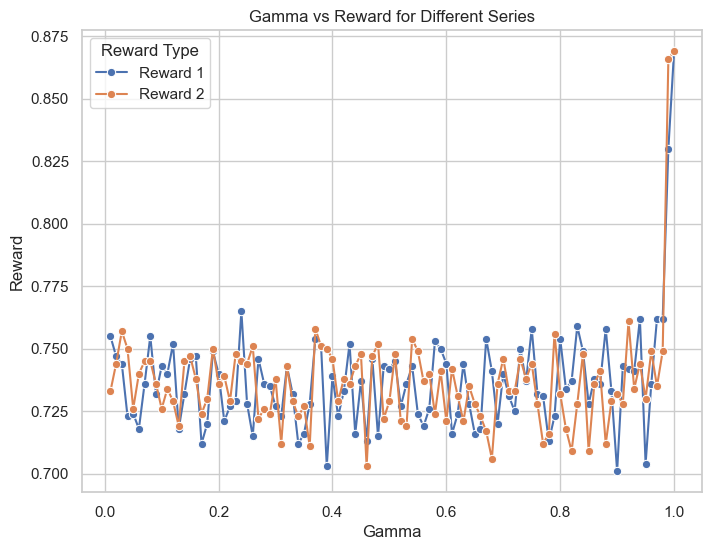

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot each reward column separately
sns.lineplot(data=result, x='gamma', y='reward_1', marker="o", label="Reward 1")
sns.lineplot(data=result, x='gamma', y='reward_2', marker="o", label="Reward 2")

plt.xlabel('Gamma')
plt.ylabel('Reward')
plt.title('Gamma vs Reward for Different Series')
plt.legend(title='Reward Type')

# Show the plot
plt.show()

На графике не видно существенных различий в обучении алгоритма для любого значения gamma. Алгоритм, основанный на теореме о неподвижной точке для сжимающего отображения гарантирует достижение неподвижной точки из любых значений, поэтому какими бы мы не выбрали значения value, результат будет одинаковый.

**Результат:**
* Алгоритм работает, если переиспользовать обученные значения value.
* Алгоритм работает так же эффективно.

Написать Value Iteriation. Исследовать гиперпараметры (в том числе gamma). Cравнить с Policy Iteration. Поскольку в Policy Iteration есть еще внутренний цикл, то адекватным сравнением алгоритмов будет не графики их результативности относительно внешнего цикла, а графики относительно, например, количества обращения к среде.

In [34]:
df4 = pd.read_csv("task3.csv")
df4.head()

,gamma,reward
0,0.01,0.729
1,0.02,0.729
2,0.03,0.746
3,0.04,0.722
4,0.05,0.751


In [35]:
df4 = df4.rename(columns={"reward": "reward_2"})
result = pd.merge(df1, df4, on="gamma")
result.head()

,gamma,reward_1,reward_2
0,0.01,0.755,0.729
1,0.02,0.747,0.729
2,0.03,0.744,0.746
3,0.04,0.723,0.722
4,0.05,0.724,0.751


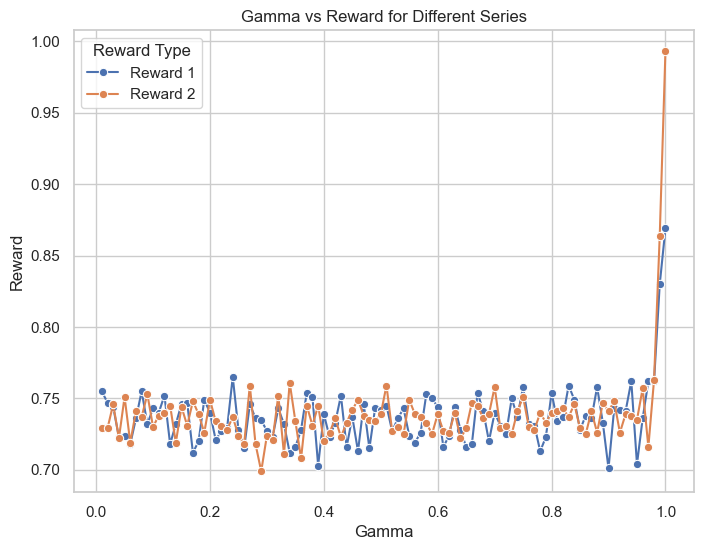

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot each reward column separately
sns.lineplot(data=result, x='gamma', y='reward_1', marker="o", label="Reward 1")
sns.lineplot(data=result, x='gamma', y='reward_2', marker="o", label="Reward 2")

plt.xlabel('Gamma')
plt.ylabel('Reward')
plt.title('Gamma vs Reward for Different Series')
plt.legend(title='Reward Type')

# Show the plot
plt.show()

Value iteration показывает почти такие же результаты как и policy iteration для всех значений gamma кроме 1. Кажется, что разброс значений у value iteration меньше, то есть алгоритм стабильнее, хотя это трудно измерить. Для значения gamma = 1 value iteration показал существенно лучший результат, более 0.99. Policy iteration в данном примере имел 20 шагов на policy evaluation и 20 эпох, за это время, очевидно, не удалось найти безопасную стратегию которая не будет делать потенциальные шаги в пропасть, в то время как value iteration имел 400 шагов на обновление value function, и успел найти верные значения, чтоб избегать опасных маневров. Сложно сравнивать подобные алгоритмы, так как они находятся не в равных условиях, при достаточном числе шагов они оба сойдутся к оптимальной стратегии, но для данной простой среды value iteration делает это быстрее.

**Результат:**
* value iteration показывает лучший результат, чем policy iteration для данной среды при gamma = 1.